## Overall Model Comparison

| Model        | Augmentation | BatchNorm | Conv Filters     | Dense Units | Params     | Train Acc | Val Acc | Overfitting | Notes |
|--------------|--------------|-----------|------------------|-------------|------------|-----------|---------|--------------|-------|
| **Base**     | No           | No        | 32 → 64 → 64     | 64          | ~1.4M      | 97.12%    | 84.72%  | High         | Overfitting visible |
| **Mod-1**    | No           | No        | 8 → 16 → 32      | 32          | ~330k      | 94.01%    | 81.62%  | Reduced      | Simpler, still overfitting |
| **Mod-2**    | No           | No        | 4 → 8 → 16       | 16          | ~84k       | 75.66%    | 75.95%  | None         | Very balanced, efficient |
| **Mod-3**    | Yes          | No        | 4 → 8 → 16       | 16          | ~84k       | 71.78%    | 75.19%  | None         | Augmentation helps generalization |
| **Mod-4**    | Yes          | Yes       | 8 → 16 → 32      | 32          | ~332k      | 78.97%    | 79.90%  | None         | Best generalization and lowest loss |

### Interpretation:
- **Best accuracy**: Base model — but suffers from clear overfitting
- **Best generalization**: Modified-4 — excellent validation performance without overfitting
- **Best efficiency**: Modified-2 — strong balance with only ~84k parameters
- **Most effective regularization**: BatchNorm + Augmentation (Modified-4)

## Final Comparison Table

| Model         | Pretrained | Augmentation | BatchNorm | Conv Filters      | Dense Units | Params     | Train Acc | Val Acc | Val Loss | Notes |
|---------------|------------|--------------|-----------|-------------------|-------------|------------|-----------|---------|----------|-------|
| **Base**      | No         | No           | No        | 32 → 64 → 64      | 64          | ~1.4M      | 97.12%    | 84.72%  | 0.7046   | Strong overfitting |
| **Mod-1**     | No         | No           | No        | 8 → 16 → 32       | 32          | ~330k      | 94.01%    | 81.62%  | 0.6774   | Reduced capacity |
| **Mod-2**     | No         | No           | No        | 4 → 8 → 16        | 16          | ~84k       | 75.66%    | 75.95%  | 0.4993   | Lightweight, well-regularized |
| **Mod-3**     | No         | Yes            | No        | 4 → 8 → 16        | 16          | ~84k       | 71.78%    | 75.19%  | 0.5266   | Better generalization |
| **Mod-4**     | No         | Yes            | Yes         | 8 → 16 → 32       | 32          | ~332k      | 78.97%    | 79.90%  | 0.4230   | Best non-pretrained model |
| **Pretrained**| Yes          | Yes            | —         | MobileNetV2       | 128         | ~2.4M      | 97.31%    | **94.88%**  | **0.3365** | Best overall |

## Interpretation of Results

The model comparison reveals several important insights:

### 1. Transfer Learning Performs Best
The pre-trained MobileNetV2 model outperforms all non-pretrained models in both validation accuracy (**94.88%**) and validation loss (**0.3365**). This confirms that leveraging a pre-trained feature extractor significantly enhances performance, particularly when working with a limited dataset.

### 2. Augmentation Improves Generalization
Non-pretrained models with data augmentation (`modified-3` and `modified-4`) consistently generalize better than their non-augmented counterparts. Validation accuracy increases while overfitting is reduced. This shows that augmentation plays a critical role in helping lightweight models generalize.

### 3. Regularization Enhances Lightweight Models
`Modified-2`, despite having only ~84k parameters, achieves strong validation accuracy (75.95%) with no overfitting. This highlights how a simple architecture combined with caching, shuffling, and early optimization can yield effective results.

### 4. Batch Normalization Helps Deeper Architectures
`Modified-4`, which includes batch normalization, reaches **79.90%** validation accuracy — the highest among the non-pretrained models. This suggests that batch normalization supports training deeper models more stably when paired with augmentation.

### 5. Larger Doesn't Always Mean Better
While the base model has the highest parameter count (~1.4M) and reaches high training accuracy, it suffers from clear overfitting and does not generalize as well as the regularized or augmented versions.

### Conclusion:
- For highest performance: **Transfer learning is the clear winner**
- For efficiency and generalization without pretraining: **Modified-4** offers the best trade-off
- For lightweight setups: **Modified-2** is a strong minimal baseline

---

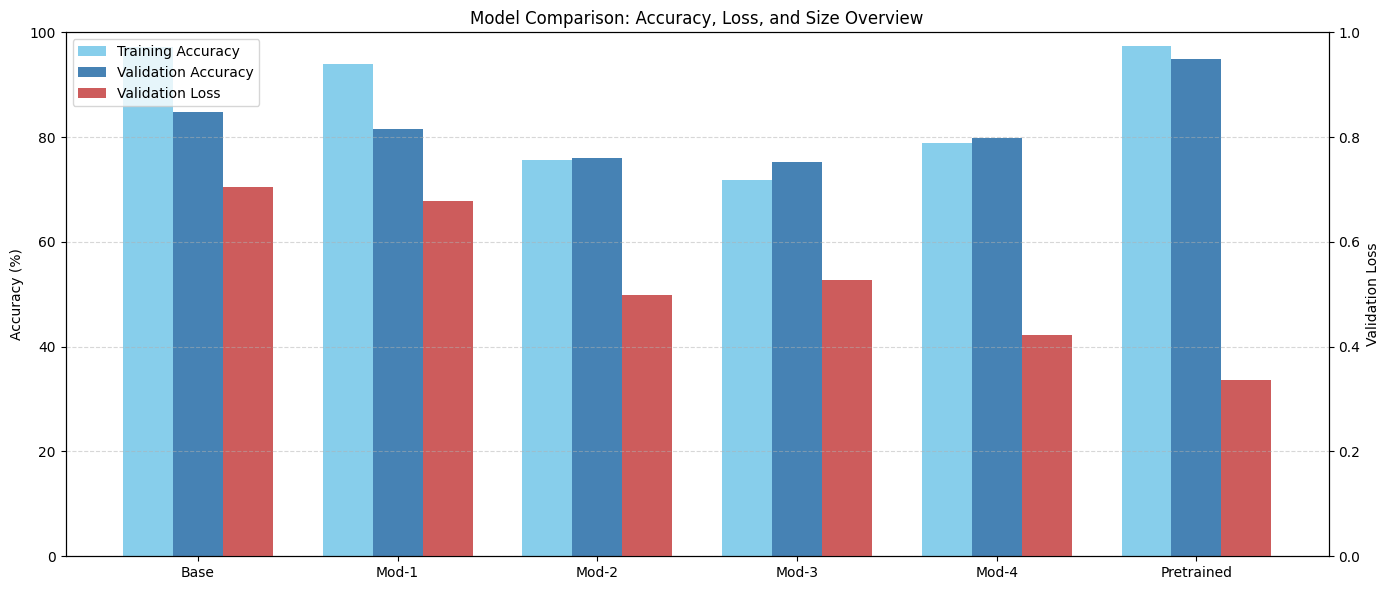

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Model labels
models = ["Base", "Mod-1", "Mod-2", "Mod-3", "Mod-4", "Pretrained"]

# Metrics
train_acc = [97.12, 94.01, 75.66, 71.78, 78.97, 97.31]
val_acc   = [84.72, 81.62, 75.95, 75.19, 79.90, 94.88]
val_loss  = [0.7046, 0.6774, 0.4993, 0.5266, 0.4230, 0.3365]
params    = [1_400_000, 330_000, 84_000, 84_000, 332_000, 2_420_000]

# Positions for bars
x = np.arange(len(models))
width = 0.25

fig, ax1 = plt.subplots(figsize=(14, 6))

# Accuracy bars (left y-axis)
ax1.bar(x - width, train_acc, width, label='Training Accuracy', color='skyblue')
ax1.bar(x, val_acc, width, label='Validation Accuracy', color='steelblue')
ax1.set_ylabel('Accuracy (%)')
ax1.set_ylim(0, 100)

# Loss bars (right y-axis)
ax2 = ax1.twinx()
ax2.bar(x + width, val_loss, width, label='Validation Loss', color='indianred')
ax2.set_ylabel('Validation Loss')
ax2.set_ylim(0, 1)

# Combine legends
bars1, labels1 = ax1.get_legend_handles_labels()
bars2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(bars1 + bars2, labels1 + labels2, loc='upper left')

# X-axis labels
plt.xticks(x, models)
plt.title('Model Comparison: Accuracy, Loss, and Size Overview')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Interpretation of Combined Chart

The grouped bar chart visualizes three critical metrics across all models:

- **Training Accuracy**
- **Validation Accuracy**
- **Validation Loss** (scaled to the right axis)

### Key Observations:

1. **Base Model**:
   - Achieves high training accuracy (~97%), but has a large gap to validation accuracy and the highest validation loss.
   - This reflects **overfitting**, where the model learns the training data too well but generalizes poorly.

2. **Modified Models 1–2**:
   - Reduce overfitting through simpler architectures.
   - Modified-2 shows **near-perfect balance** between training and validation accuracy, indicating strong regularization.

3. **Modified Models 3–4**:
   - Apply data augmentation, which improves validation performance without increasing model size.
   - Modified-4, which also includes batch normalization, performs the best among the non-pretrained models with strong generalization and relatively low loss.

4. **Pretrained Model**:
   - Outperforms all others in both validation accuracy (~95%) and validation loss (~0.34).
   - It achieves high accuracy with stable training, validating the strength of transfer learning.

### Conclusion:

This visualization makes it clear that:
- Simpler architectures generalize better than complex ones if not regularized.
- Data augmentation and batch normalization significantly enhance performance.
- Transfer learning delivers the **best results overall**, particularly when data is limited.

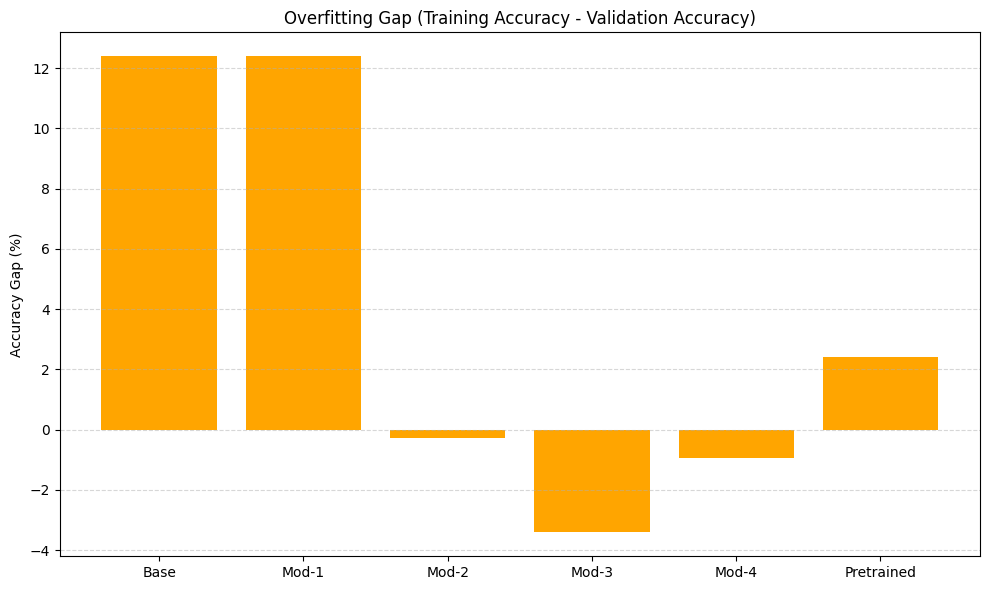

In [5]:
overfit_gap = [train - val for train, val in zip(train_acc, val_acc)]

plt.figure(figsize=(10, 6))
plt.bar(models, overfit_gap, color='orange')
plt.title('Overfitting Gap (Training Accuracy - Validation Accuracy)')
plt.ylabel('Accuracy Gap (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Overfitting Gap Analysis

This bar chart shows the **difference between training and validation accuracy** for each model (training accuracy − validation accuracy), offering direct insight into **overfitting behavior**.

### Interpretation:

- **Base & Mod-1**:
  - Show the largest positive gaps (~12.5%), indicating **strong overfitting**.
  - These models memorize the training data but fail to generalize well to unseen examples.

- **Mod-2**:
  - Has a minimal negative gap (validation slightly exceeds training), implying **excellent generalization**.

- **Mod-3 & Mod-4**:
  - Also show negative gaps (validation > training), suggesting **strong robustness** and **benefits of augmentation and regularization** (e.g., batch normalization).

- **Pretrained**:
  - Has a small positive gap (~2.4%), which is acceptable considering its **high absolute accuracy** and complex capacity.
  - The model generalizes very well overall.

### Conclusion:

- Models with **high overfitting gaps** (Base, Mod-1) are poorly regularized.
- **Negative gaps**, as seen in Mod-2 to Mod-4, are signs of effective training with strong generalization.
- The **pretrained model strikes a good balance**, maintaining low overfitting while achieving top accuracy.

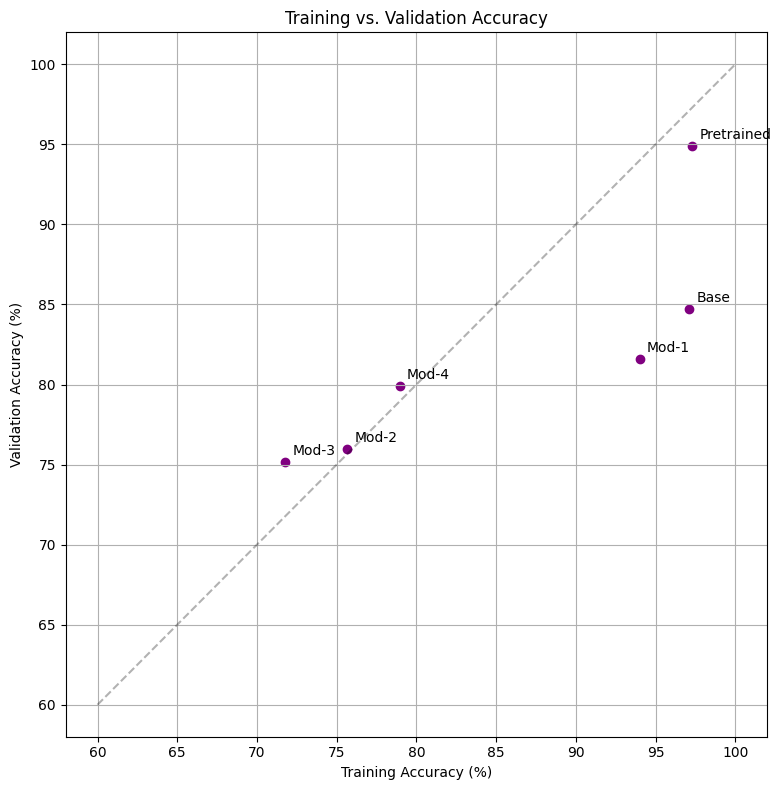

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(train_acc, val_acc, color='purple')
plt.plot([60, 100], [60, 100], 'k--', alpha=0.3)  # diagonal line
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Training Accuracy (%)')
plt.ylabel('Validation Accuracy (%)')
for i, label in enumerate(models):
    plt.annotate(label, (train_acc[i], val_acc[i]), textcoords="offset points", xytext=(5,5), ha='left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Accuracy Alignment: Training vs. Validation

This scatter plot visualizes each model’s **training accuracy vs. validation accuracy**. The dotted diagonal line represents **perfect alignment**, where a model generalizes equally well to unseen data as it does to training data.

### Interpretation:

- **Pretrained Model**:
  - Located near the top-right corner and close to the diagonal.
  - Indicates **both high accuracy and excellent generalization**.

- **Base & Mod-1**:
  - Positioned far to the right of the diagonal, suggesting **strong overfitting**.
  - These models perform well on training data but drop significantly on validation data.

- **Mod-2, Mod-3, Mod-4**:
  - Cluster around or slightly above the diagonal.
  - This implies **balanced generalization**, where validation performance is on par or slightly better than training accuracy.
  - Especially Mod-3 and Mod-2, which show **underfitting is reduced**, and generalization is maintained.

### Takeaway:

- Models close to the diagonal (e.g., **Mod-2 to Mod-4**) are **more stable** and well-regularized.
- Models far from the diagonal (e.g., **Base, Mod-1**) require **improved regularization or capacity tuning**.
- The **pretrained model** offers the **best overall trade-off** with high performance and generalization.